Apple Counting: 2


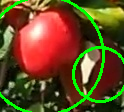

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


image = cv2.imread('/content/testset1_60cluster_6.jpg') #读取图像


hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
red_low = np.array([0, 120, 70])  #这里是设置红色的最低限
red_high = np.array([10, 255, 255]) #这里是设置红色的最高限
maker = cv2.inRange(hsv, red_low, red_high)#这里是只筛选红色的区域并改成白色

kernel = np.ones((5, 5), np.uint8)
#下面将图片进行腐蚀与膨胀
marker = cv2.morphologyEx(maker, cv2.MORPH_CLOSE, kernel)
marker = cv2.morphologyEx(maker, cv2.MORPH_OPEN, kernel)

contours, _ = cv2.findContours(maker, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

apple = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 300:
        apple += 1

        (x, y), radius = cv2.minEnclosingCircle(contour)
        cv2.circle(image, (int(x), int(y)), int(radius), (0, 255, 0), 2)

print(f'Apple Counting: {apple}')
cv2_imshow(image)


